# COGS 108 - Project Proposal

# Names & GitHub ID

- Name: **Jitarth Sheth**
- GitHub Username: [**jshethbright**](https://github.com/jshethbright)

# Research Question

What is the relationship between community median household income, park availability, and number of park quality within cities in San Diego County?

## Background and Prior Work

Parks are a crucial component of improving public health and fostering a sense of community. They provide numerous benefits ranging from improving communty fitness by encouraging exercise to mitigating climate change through the creation of green zones withing cities.<sup>3</sup> However, not all parks are created equal. Many parks lack various amenities caused by a scarcity of funding, which can reduce foot traffic to these parks and reduce their positive effectiveness. Specifically, in San Diego, park amenity and funding greatly vary between communities.<sup>1</sup> 

According to a study on neighborhood income and disparities in facilities, communities with lower neighborhood income are more likely to have parks with lower quality facilities and amenities than those with higher incomes.<sup>2</sup> In low-income communities, there is also higher incidence rate for childhood obesity, leading to a greater importance of parks in improving health and fitness.<sup>4</sup>

Prior research has been conducted in the Thoman L et al.<sup>2</sup> and Megan et al.<sup>5</sup> studies looking at the lack of park facilities in low-income neighborhoods, however, these studies only look at low-income communities and do not look at whether there is a correlation between median income and park funding and amenities. My research question would provide greater insight into these possible correlations by looking at the median income in all communities, not just low-income areas. This information would possibly help determine where San Diego park funds and amenities should be allocated to improve not just parks in low-income communities, but all parks in San Diego.


References:
- 1) [San Diego Parks Master Plan](https://www.sandiegocounty.gov/content/dam/sdc/parks/CAPRA/2.0%20EXHIBITS/2.4A%20Master%20Plan.pdf)
- 2) [McKenzie, Thomas L et al. "Neighborhood Income Matters: Disparities in Community Recreation Facilities,  Amenities, and Programs." *Journal, of park and recreation administrations vol. 31(2013): 12-22](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4082954/)
- 3) https://www.nrpa.org/blog/parks-and-public-health-working-together-to-advance-health-and-wellness/
- 4) [Rogers, Robert et al. “The Relationship between Childhood Obesity, Low Socioeconomic Status, and Race/Ethnicity: Lessons from Massachusetts.” *Childhood obesity (Print)* vol. 11,6 (2015): 691-5. doi:10.1089/chi.2015.0029](https://pubmed.ncbi.nlm.nih.gov/26562758/)
- 5) [Knapp, Megan et al. “The Relationships between Park Quality, Park Usage, and Levels of Physical Activity in Low-Income, African American Neighborhoods.” *International journal of environmental research and public health* vol. 16,1 85. 30 Dec. 2018, doi:10.3390/ijerph16010085](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6338998/)

# Hypothesis


Since low park amenity and spending has already been observed in low-income communities, I hypothesize that there will be a positive correlation between median income and park spending as well as a positive correlation between median income and number of park amenities within San Diego. Communities with higher median income will likely receive higher park funding as a result of higher taxes, likely leading to a greater amount of park amenities. Similarly, lower median income communities will have lower funding due to lower taxes, leading to less amenities.

# Data

The ideal dataset for answering my research question would contain the following variables under the following organization scheme:
* Community Info
    * Community Name (22 Observations)
    * Community Median Household Income (22 Observations)
    * Park Info (Organized by community name)
        * Park Name
        * Park Spending (Organized by park name)
        * Number of Park Amenities (Organized by park name)
        
Community information would be organized into 22 observations by community name as listed in the publicly available parks master plan. Name and median household income would also similarly be collected from the same master plan data. Park information would also be constructed from publicly available data from the San Diego government. This data would likely be collected from a parks survey, listing spending/budget and a list of park amenities. Park information would have an unknown number of observations as the number of parks in a community and henceforth the number of amenities, is variable. 

This data would be organized into a dataframe following the listed organization scheme.

# Ethics & Privacy

This dataset will likely be created from publicly available data by the San Diego Parks and Rec department. Additionally, this data will presumably follow the San Diego's "[Open Data Policy](http://dockets.sandiego.gov/sirepub/view.aspx?cabinet=published_meetings&fileid=757846)," providing permission for anyone to freely use the publicly available data.

Before utilizing any dataset, I will check it for any personally identifiable information in order to alleviate any privacy concerns. As the data listed in the organization scheme does not contain any private information, there is also a low chance that the datasets used for the data will contain any private information. I will also check each dataset to make sure I am adhering to whichever open source or open use policy the dataset is published under.

A potential bias in the datasets associated with this analysis would be the size and organization of the communities listed in the dataset. Community borders could have been designed to intentionally inflate or deflate the median income of that community. An unintended consequence of this would be that median income would not be a reliable factor in determining the true financial status of a community and its residents. A possible solution for addressing this issue would be to determine the source of the median income data and judge its reliability. Overall, a chance of inaccuracy in median income data is very low as the dataset would most likely be audited by San Diego officials before being published.

Furthermore, this analysis cannot be used to generalize to the overall effects of median income on park quality in the broader world as it only deals with the unique situation of San Diego. The park conditions and fund usage in San Diego may not correspond to other areas.


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
# Import all datasets needed
df_access = pd.read_excel('data/hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.xlsx')
df_income = pd.read_csv('data/2016_San_Diego_County_Demographics_-_Number_of_Households_by_Household_Income__by_City.csv')
df_zip = pd.read_csv('data/zip-codes-database.csv', dtype = {'ZipCode' : object})
df_review = pd.read_csv('data/yelp_SD_parks.csv')

# Data Cleaning

### Clean datasets to focus on data for analysis and omit unecessary data.

Clean 'CA Access to Parks' data:

In [3]:
# Filter dataset on parks' access to only include San Diego County
df_access = df_access[df_access.county_name == 'San Diego']

# Remove columns not needed for current analysis
df_access = df_access[['geoname', 'race_eth_code', 'estimate', 'strata_one_code']]

# Only choose data with strata_one_code 6 (meaning total estimate) and race_eth_code 9 as we are not considering race
# in this analysis
df_access = df_access.loc[(df_access.strata_one_code == 6.0) & (df_access.race_eth_code == 9.0)]

# Specify only cities within SD County
df_access = df_access.loc[df_access.geoname.str.contains('city'), :]

# Remove 'city' text from geoname and only choose columns of geoname and estimate
df_access.geoname = df_access.geoname.str.replace(' city', '')
df_access = df_access[['geoname', 'estimate']]

Clean 'Number of Households by Household Income, by City' data

In [4]:
# Filter dataset on household income in SD county to only include percentages
df_income = df_income.loc[:, ~df_income.columns.str.contains('#')]

# Clean up column names
df_income.columns = df_income.columns.str.replace('-', ' to ')
df_income.columns = df_income.columns.str.replace('$', '')
df_income.columns = df_income.columns.str.replace('%', '')
df_income.columns = df_income.columns.str.replace(r'\(.*\)','')
df_income.columns = df_income.columns.str.strip()

# Rename 'Geography' column to 'geoname' to match df_access
df_income = df_income.rename(columns = {'Geography' : 'geoname'})

# Remove 'City of ' from city names
df_income.geoname = df_income.geoname.str.replace('City of ', '')

# Only chose columns of geoname and percentage of households with income under $35,000
df_income = df_income[['geoname', 'Under 35,000']]

In [5]:
# Merge df_access and df_income
df_merge = df_income.merge(df_access)

Clean zip code data:

In [6]:
# Only look at zip codes in California and rename and choose only the columns of zipcode and city
df_zip = df_zip[df_zip.State == 'CA']
df_zip = df_zip[['ZipCode', 'City']]
df_zip = df_zip.rename(columns = {'ZipCode' : 'zipcode', 'City' : 'city'})

# Rename cities to match other datasets
df_zip.city = df_zip.city.str.lower().str.title()
df_zip = df_zip.loc[df_zip.city.isin(list(df_merge.geoname))]

Clean 'San Diego Parks Yelp' data:

In [7]:
# Get zip code from park address
df_review['zip'] = df_review.address.str[-5:]

# Choose only park name, rating, review count, and zipcode
df_review = df_review[['name', 'rating', 'review_count', 'zip']]

# Create match_dict which matches zipcodes to city names, map park zips to city names
match_dict = pd.Series(df_zip.city.values, index = df_zip.zipcode).to_dict()
df_review['city'] = df_review.zip.map(match_dict)

# Drop null values
df_review = df_review.dropna()

# Data Analysis & Results

First, we visualize each cleaned dataset. We visualize `df_merge` as it includes the data of `df_access` and `df_income`. We can see the % of households with income under $35,000 along with the estimated \% of population within a half mile of a park, beach, etc.

In [8]:
df_merge

,geoname,"Under 35,000",estimate
0,Carlsbad,17.2,81.127525
1,Chula Vista,26.6,92.234212
2,Coronado,17.8,72.903592
3,Del Mar,20.5,100.000000
4,El Cajon,40.0,74.548141
5,Encinitas,19.0,97.032830
6,Escondido,33.0,57.336131
7,Imperial Beach,33.7,89.538064
8,La Mesa,28.5,87.570315
9,Lemon Grove,29.2,92.476303


We look at a scatterplot of % of households with income under $35,000 on the x-axis with estimated \% of population within a half mile of a park on the y-axis. We also label each point on the scatter plot by city

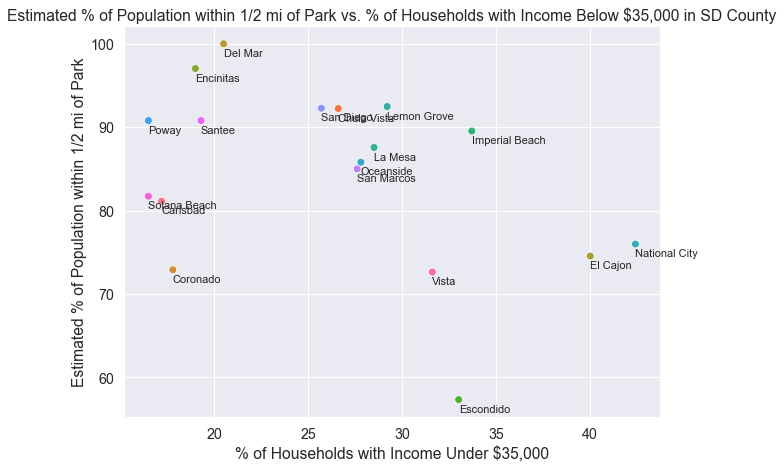

In [9]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.scatterplot(x = df_merge['Under 35,000'], y = df_merge['estimate'], s = 60, hue = df_merge['geoname'])
ax.get_legend().remove()
ax.set_title('Estimated % of Population within 1/2 mi of Park vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Estimated % of Population within 1/2 mi of Park')

for x, y, z in zip(df_merge['Under 35,000'], df_merge['estimate'], df_merge['geoname']):
    plt.text(x = x, y = y - 1.5, s = z, fontdict = {'size' : 11})

We create a function to determine the average 'quality' of parks in each city by multiplying the average yelp review score of each park by number of reviews, we then add up these values for each city and divide them by total number of reviews to essentially get a 'weighted' average quality. We do this as in some cities, some parks have a large number of reviews, making them likely more popular and contribute higher to the park 'quality' in the city. This similarly applies to parks with a large number of negative reviews.

In [10]:
def create_city_park_qual_df(df_review):
    park_qual_df = pd.DataFrame()
    
    city_list = []
    avg_park_qual_list = []
    num_parks_list = []
    
    for city in df_review.city.unique():
        temp_df = df_review[df_review.city == city]
        
        rating_mean = temp_df['rating'].mean()
        num_parks_list.append(len(temp_df.name.unique()))
        
        city_list.append(city)
        avg_park_qual_list.append(rating_mean)
        
    park_qual_df['geoname'] = city_list
    park_qual_df['avg_park_rev'] = avg_park_qual_list
    park_qual_df['num_parks'] = num_parks_list
    
    return park_qual_df

In [11]:
def create_city_park_qual_df(df_review):
    park_qual_df = pd.DataFrame()
    
    city_list = []
    avg_park_qual_list = []
    num_parks_list = []
    
    for city in df_review.city.unique():
        temp_df = df_review[df_review.city == city]
        
        rating_mean_total = sum(temp_df.rating * temp_df.review_count)
        review_count = temp_df.review_count.sum()
        rating_mean = rating_mean_total / review_count
        num_parks_list.append(len(temp_df.name.unique()))
        
        city_list.append(city)
        avg_park_qual_list.append(rating_mean)
        
    park_qual_df['geoname'] = city_list
    park_qual_df['avg_park_qual'] = avg_park_qual_list
    park_qual_df['num_parks'] = num_parks_list
    
    return park_qual_df

We connect our data on % of households with income under $35,000 and estimated \% of population within a half mile of a park to average review of parks in each city

In [12]:
df_park_qual = create_city_park_qual_df(df_review)

In [13]:
df_park_qual

,geoname,avg_park_qual,num_parks
0,San Diego,4.063698,602
1,Coronado,4.377688,7
2,Solana Beach,4.458678,7
3,San Marcos,4.545977,7
4,La Mesa,4.152695,13
5,Chula Vista,4.112426,14
6,Santee,3.672527,10
7,Escondido,4.045599,14
8,Poway,4.130451,12
9,El Cajon,3.855932,4


In [14]:
df_merge = df_merge.merge(df_park_qual)

In [15]:
df_merge

,geoname,"Under 35,000",estimate,avg_park_qual,num_parks
0,Carlsbad,17.2,81.127525,3.536232,6
1,Chula Vista,26.6,92.234212,4.112426,14
2,Coronado,17.8,72.903592,4.377688,7
3,Del Mar,20.5,100.000000,4.150899,11
4,El Cajon,40.0,74.548141,3.855932,4
5,Encinitas,19.0,97.032830,4.628436,10
6,Escondido,33.0,57.336131,4.045599,14
7,Imperial Beach,33.7,89.538064,4.044554,3
8,La Mesa,28.5,87.570315,4.152695,13
9,Lemon Grove,29.2,92.476303,4.000000,2


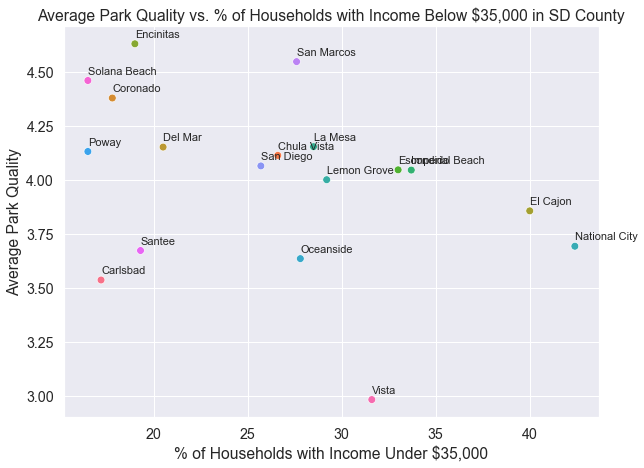

In [16]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.scatterplot(x = df_merge['Under 35,000'], y = df_merge['avg_park_qual'], s = 60, hue = df_merge['geoname'])
ax.get_legend().remove()
ax.set_title('Average Park Quality vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Average Park Quality')

for x, y, z in zip(df_merge['Under 35,000'], df_merge['avg_park_qual'], df_merge['geoname']):
    plt.text(x = x, y = y + .03, s = z, fontdict = {'size' : 11})

We can also create linear regression plots to view the possible relationships between our variables:

Text(0, 0.5, 'Estimated % of Population within 1/2 mi of Park')

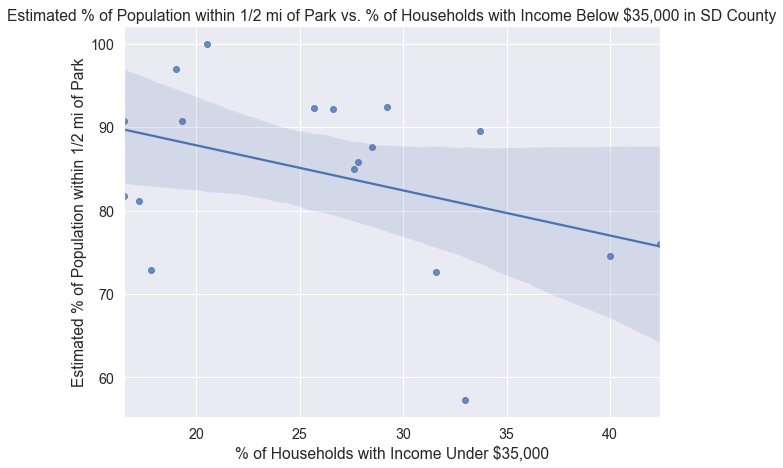

In [17]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.regplot(x = df_merge['Under 35,000'], y = df_merge['estimate'])
ax.set_title('Estimated % of Population within 1/2 mi of Park vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Estimated % of Population within 1/2 mi of Park')

Text(0, 0.5, 'Average Park Quality')

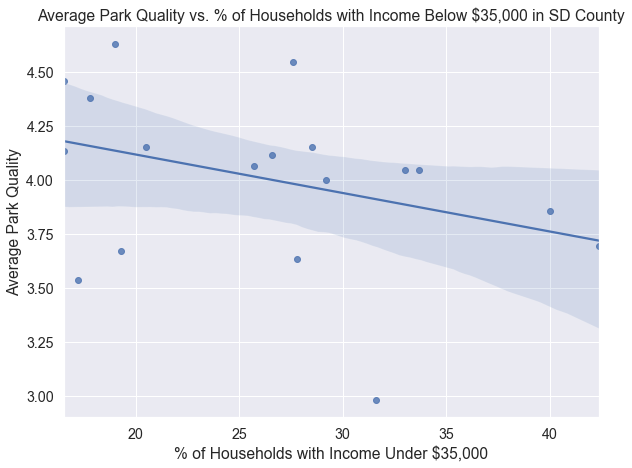

In [18]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.regplot(x = df_merge['Under 35,000'], y = df_merge['avg_park_qual'])
ax.set_title('Average Park Quality vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Average Park Quality')